In [2]:
print("""
Name: FRANK EVIN YAMI
ID : 0232112159
""")


Name: FRANK EVIN YAMI
ID : 0232112159



# **TRAUMATIC BRAIN INJURY IN USA**

## **Overview of TBI data sets**

*   This dataset was created by extracting tables from a PDF document. It serves as an excellent case study for cleaning and structuring information obtained from PDF files. The process likely involved using the pdftools package, developed by *rOpenSci*, to scrape and organize the tabular data from the PDF source.

*   This is the link to the data: https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-03-24/readme.md.

We have 3 data sets named :

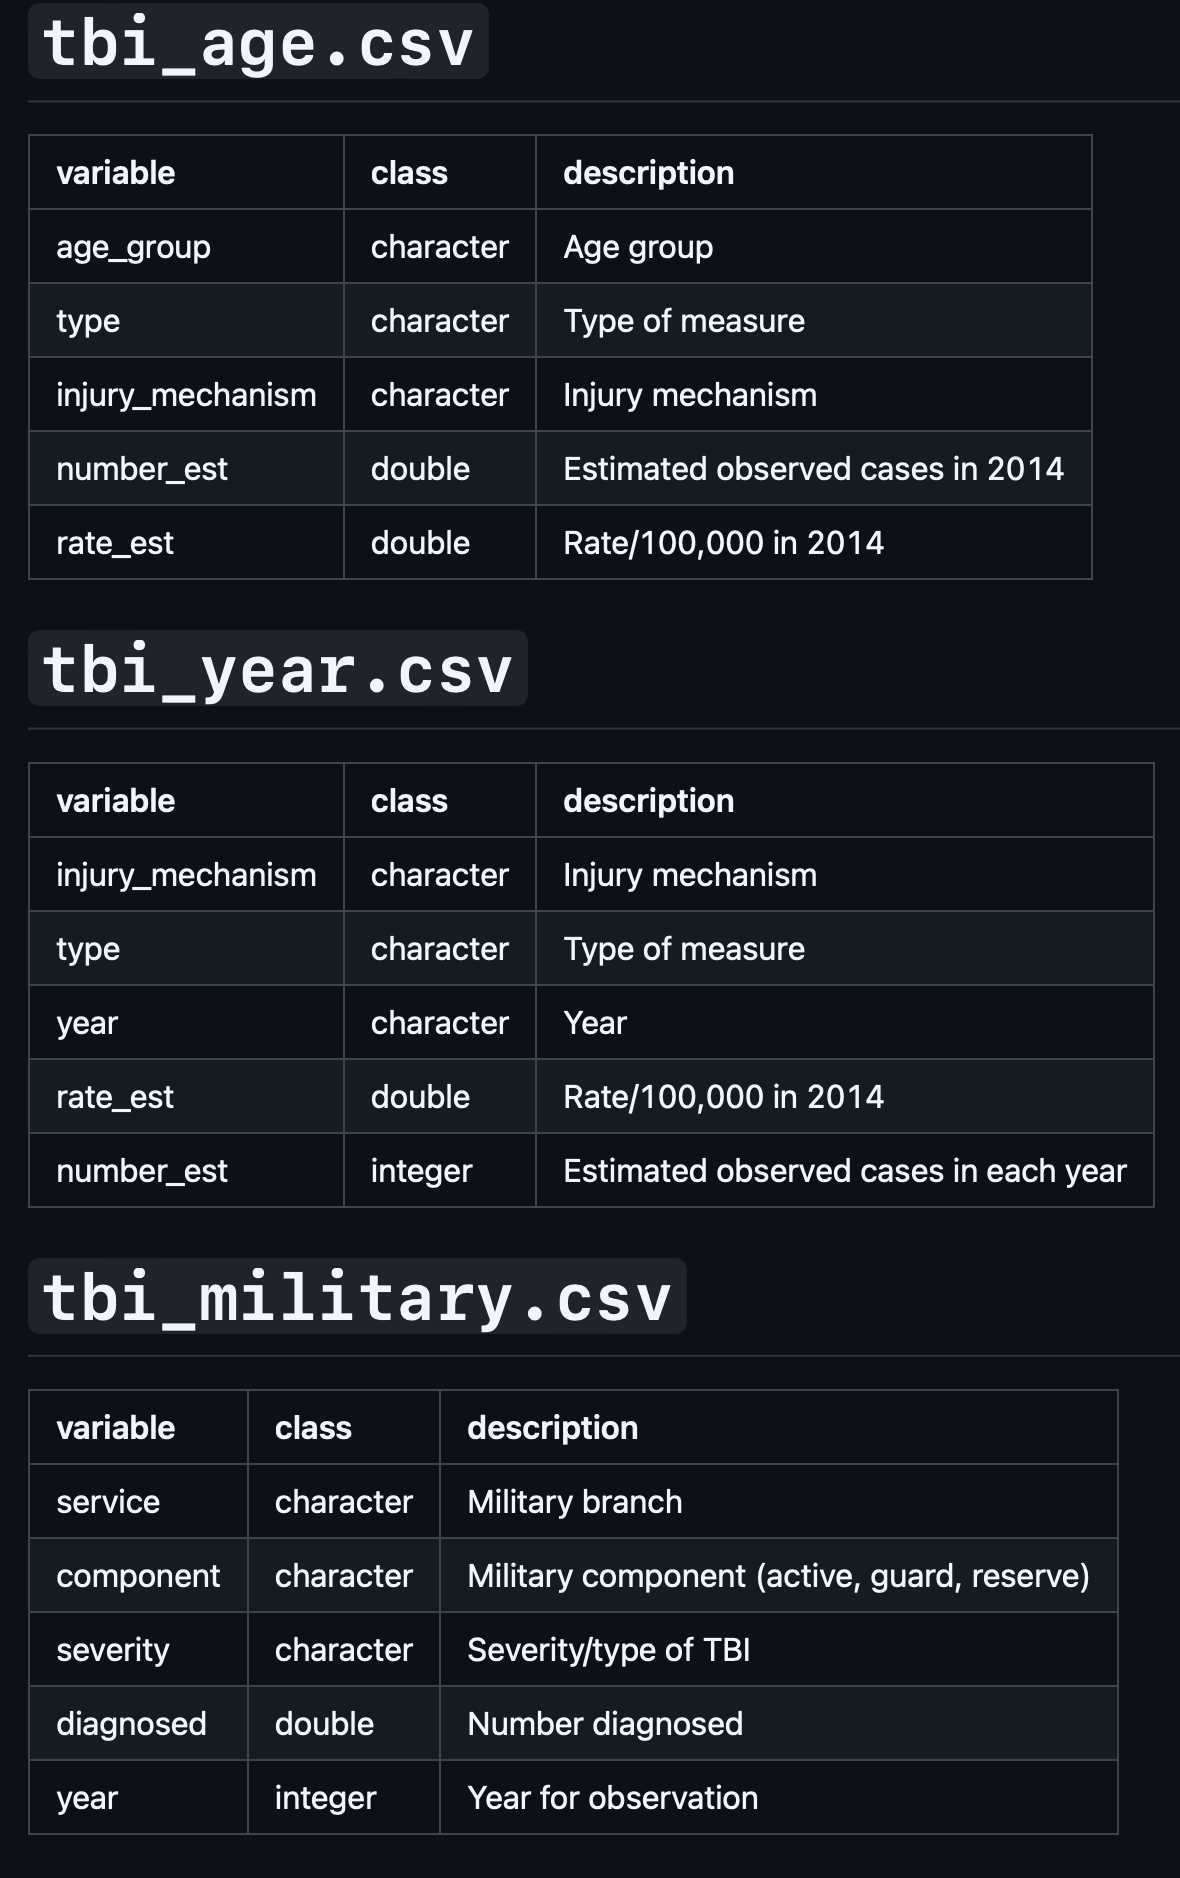




## 0. **LIBRARIES**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **1.DATA LOADING**

In [37]:
# Load the uploaded files and  Read the CSV files into DataFrames
age = pd.read_csv('/content/tbi_age.csv')
military = pd.read_csv('/content/tbi_military.csv')
year = pd.read_csv('/content/tbi_year.csv')

# Display the structure and first few rows of each DataFrame to understand their contents
age_info = age.info(), age.head()
military_info = military.info(), military.head()
year_info = year.info(), year.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_group         231 non-null    object 
 1   type              231 non-null    object 
 2   injury_mechanism  231 non-null    object 
 3   number_est        220 non-null    float64
 4   rate_est          220 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   service    450 non-null    object 
 1   component  450 non-null    object 
 2   severity   450 non-null    object 
 3   diagnosed  438 non-null    float64
 4   year       450 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 

In [40]:
age_info

(None,
   age_group                        type  \
 0      0-17  Emergency Department Visit   
 1      0-17  Emergency Department Visit   
 2      0-17  Emergency Department Visit   
 3      0-17  Emergency Department Visit   
 4      0-17  Emergency Department Visit   
 
                                     injury_mechanism  number_est  rate_est  
 0                              Motor Vehicle Crashes     47138.0      64.1  
 1                                Unintentional Falls    397190.0     539.8  
 2     Unintentionally struck by or against an object    229236.0     311.6  
 3  Other unintentional injury, mechanism unspecified     55785.0      75.8  
 4                              Intentional self-harm         NaN       NaN  )

In [35]:
year_info

(None,
         injury_mechanism                        type  year  rate_est  \
 0  Motor vehicle crashes  Emergency Department Visit  2006      85.3   
 1  Motor vehicle crashes  Emergency Department Visit  2007      83.8   
 2  Motor vehicle crashes  Emergency Department Visit  2008      83.9   
 3  Motor vehicle crashes  Emergency Department Visit  2009      88.7   
 4  Motor vehicle crashes  Emergency Department Visit  2010      95.3   
 
    number_est  
 0    254793.0  
 1    252459.0  
 2    254391.0  
 3    270240.0  
 4    292942.0  )

In [36]:
military_info

(None,
   service component          severity  diagnosed  year
 0    Army    Active       Penetrating      189.0  2006
 1    Army    Active            Severe      102.0  2006
 2    Army    Active          Moderate      709.0  2006
 3    Army    Active              Mild     5896.0  2006
 4    Army    Active  Not Classifiable      122.0  2006)

### Overview of TBI Datasets

#### 1. tbi_age.csv

Columns:
age_group: Age groups (e.g., 0-17).

type: Type of TBI-related visit (e.g., Emergency Department Visit).

injury_mechanism: Cause of injury (e.g., Motor Vehicle Crashes).

number_est: Estimated number of cases.

rate_est: Estimated rate of cases per 100,000 population.

Rows: 231

Key Observations:
Some rows have missing values in number_est and rate_est.

#### 2. tbi_military.csv

Columns:
service: Military service branch (e.g., Army).

component: Service component (e.g., Active).

severity: TBI severity (e.g., Mild, Severe).

diagnosed: Number of diagnosed cases.

year: Year of occurrence.

Rows: 450

Key Observations:

The column diagnosed has some missing values.

#### 3. tbi_year.csv

Columns:
injury_mechanism: Cause of injury.

type: Type of TBI-related visit.

year: Year of occurrence.

rate_est: Estimated rate of cases per 100,000 population.

number_est: Estimated number of cases.

Rows: 216

Key Observations:
Some rows have missing values in number_est.


## 2. **DATA CLEANING**

In [13]:
# Create a dictionary of DataFrames for convenience
dataframes = {"age": age, "military": military, "year": year}

# Checking for missing values in each dataset
missing_values_summary = {name: df.isnull().sum() for name, df in dataframes.items()}

# Display the percentage of missing data for each column
missing_percentage = {name: (df.isnull().mean() * 100).round(2) for name, df in dataframes.items()}

age.info(), military.info(), year.info(), missing_values_summary, missing_percentage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_group         231 non-null    object 
 1   type              231 non-null    object 
 2   injury_mechanism  231 non-null    object 
 3   number_est        220 non-null    float64
 4   rate_est          220 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   service    450 non-null    object 
 1   component  450 non-null    object 
 2   severity   450 non-null    object 
 3   diagnosed  438 non-null    float64
 4   year       450 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 

(None,
 None,
 None,
 {'age': age_group            0
  type                 0
  injury_mechanism     0
  number_est          11
  rate_est            11
  dtype: int64,
  'military': service       0
  component     0
  severity      0
  diagnosed    12
  year          0
  dtype: int64,
  'year': injury_mechanism     0
  type                 0
  year                 0
  rate_est             0
  number_est          27
  dtype: int64},
 {'age': age_group           0.00
  type                0.00
  injury_mechanism    0.00
  number_est          4.76
  rate_est            4.76
  dtype: float64,
  'military': service      0.00
  component    0.00
  severity     0.00
  diagnosed    2.67
  year         0.00
  dtype: float64,
  'year': injury_mechanism     0.0
  type                 0.0
  year                 0.0
  rate_est             0.0
  number_est          12.5
  dtype: float64})

Here we decide to use imputation to handle misssing values.

In [14]:
# Impute missing values with the median for numeric columns
for name, df in dataframes.items():
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values remain
missing_values_post_imputation = {name: df.isnull().sum().sum() for name, df in dataframes.items()}
missing_values_post_imputation


<ipython-input-14-3cf3e2250c68>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-14-3cf3e2250c68>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

{'age': 0, 'military': 0, 'year': 0}

In [15]:
# Impute missing 'number_est' in 'tbi_year' using the global median
year['number_est'] = year['number_est'].fillna(year['number_est'].median())

# Confirm no missing values remain in all datasets
missing_values_after_imputation = {
    "tbi_age": age.isnull().sum(),
    "tbi_military": military.isnull().sum(),
    "tbi_year": year.isnull().sum()
}

missing_values_after_imputation


{'tbi_age': age_group           0
 type                0
 injury_mechanism    0
 number_est          0
 rate_est            0
 dtype: int64,
 'tbi_military': service      0
 component    0
 severity     0
 diagnosed    0
 year         0
 dtype: int64,
 'tbi_year': injury_mechanism    0
 type                0
 year                0
 rate_est            0
 number_est          0
 dtype: int64}

In [23]:
# Overview Analysis

# Summary statistics for each dataset
overview_age = age.describe(include='all')
overview_military = military.describe(include='all')
overview_year = year.describe(include='all')

overview_age


,age_group,type,injury_mechanism,number_est,rate_est
count,231,231,231,2.310000e+02,231.000000
unique,11,3,7,NaN,NaN
top,0-17,Emergency Department Visit,Motor Vehicle Crashes,NaN,NaN
freq,21,77,33,NaN,NaN
mean,NaN,NaN,NaN,2.865680e+04,48.819264
std,NaN,NaN,NaN,9.824344e+04,142.262500
min,NaN,NaN,NaN,1.600000e+01,0.000000
25%,NaN,NaN,NaN,6.255000e+02,1.500000
50%,NaN,NaN,NaN,2.581000e+03,5.750000
75%,NaN,NaN,NaN,1.623250e+04,40.900000


In [24]:
overview_military

,service,component,severity,diagnosed,year
count,450,450,450,450.000000,450.000000
unique,4,3,5,NaN,NaN
top,Army,Active,Penetrating,NaN,NaN
freq,135,180,90,NaN,NaN
mean,NaN,NaN,NaN,541.106667,2010.000000
std,NaN,NaN,NaN,1616.682336,2.584863
min,NaN,NaN,NaN,1.000000,2006.000000
25%,NaN,NaN,NaN,16.000000,2008.000000
50%,NaN,NaN,NaN,41.500000,2010.000000
75%,NaN,NaN,NaN,228.500000,2012.000000


In [25]:
overview_year

,injury_mechanism,type,year,rate_est,number_est
count,216,216,216.000000,216.000000,2.160000e+02
unique,8,3,NaN,NaN,NaN
top,Motor vehicle crashes,Emergency Department Visit,NaN,NaN,NaN
freq,27,72,NaN,NaN,NaN
mean,NaN,NaN,2010.000000,65.262037,1.033646e+05
std,NaN,NaN,2.587987,145.745774,2.060783e+05
min,NaN,NaN,2006.000000,0.100000,3.390000e+02
25%,NaN,NaN,2008.000000,2.150000,6.772000e+03
50%,NaN,NaN,2010.000000,7.950000,1.975400e+04
75%,NaN,NaN,2012.000000,57.000000,1.262832e+05


## **3. Exploratory Data Analyis**

*a) Trend Analysis for tbi_year dataset*

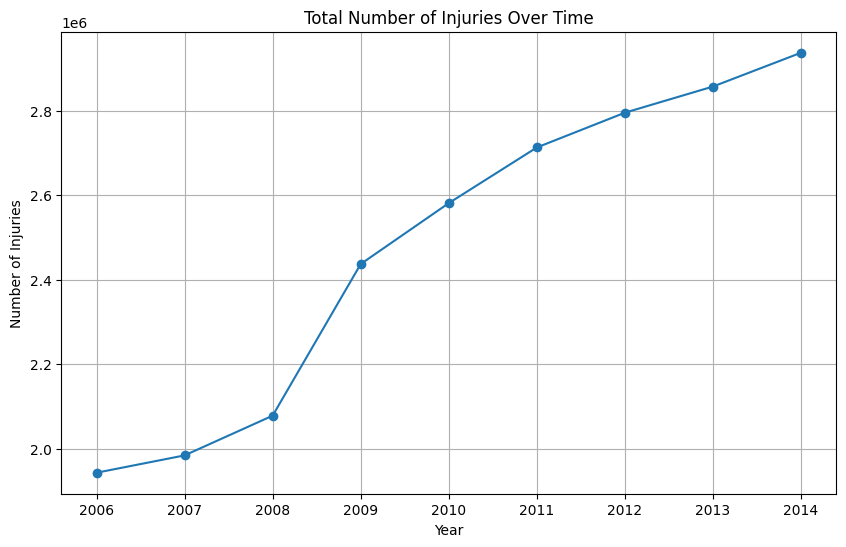

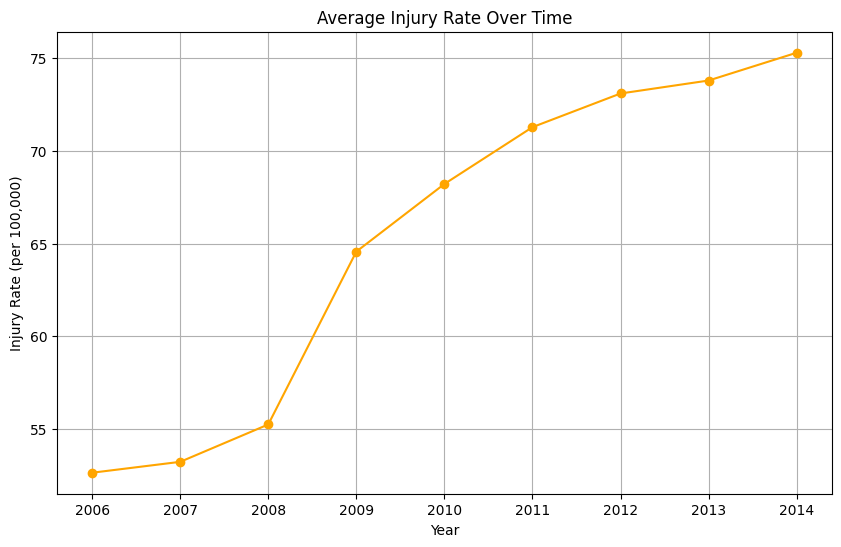

In [26]:

# Plotting trends in number_est and rate_est over the years

# Aggregate data by year for overall trends
yearly_data = year.groupby('year').agg({
    'number_est': 'sum',
    'rate_est': 'mean'
}).reset_index()

# Plotting number of injuries over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['number_est'], marker='o')
plt.title("Total Number of Injuries Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.grid()
plt.show()

# Plotting injury rates over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['rate_est'], marker='o', color='orange')
plt.title("Average Injury Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Injury Rate (per 100,000)")
plt.grid()
plt.show()



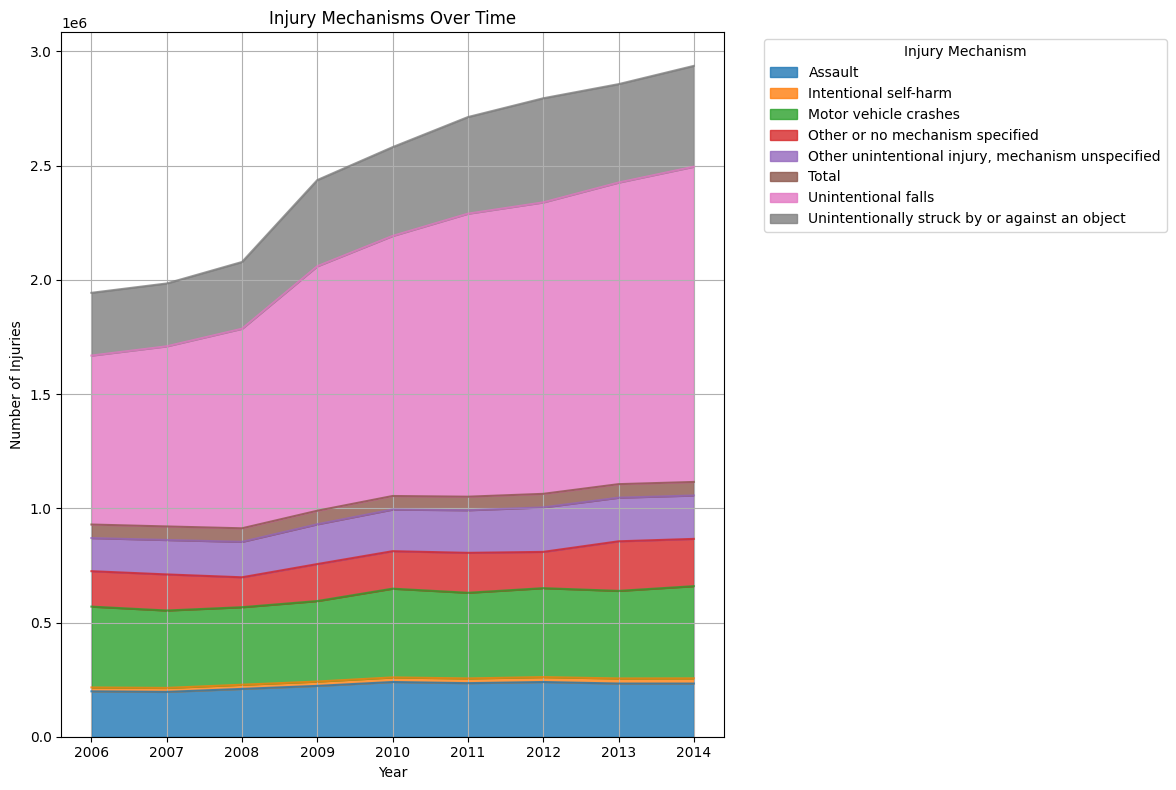

In [27]:

# Injury mechanisms over time
mechanism_trends = year.groupby(['year', 'injury_mechanism']).agg({
    'number_est': 'sum'
}).reset_index()

# Pivoting for a stacked area plot
mechanism_pivot = mechanism_trends.pivot(index='year', columns='injury_mechanism', values='number_est').fillna(0)

# Stacked area plot for injury mechanisms
mechanism_pivot.plot.area(figsize=(12, 8), alpha=0.8)
plt.title("Injury Mechanisms Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.legend(title="Injury Mechanism", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

*b) Military specific Analysis based on **tbi_military** dataset*

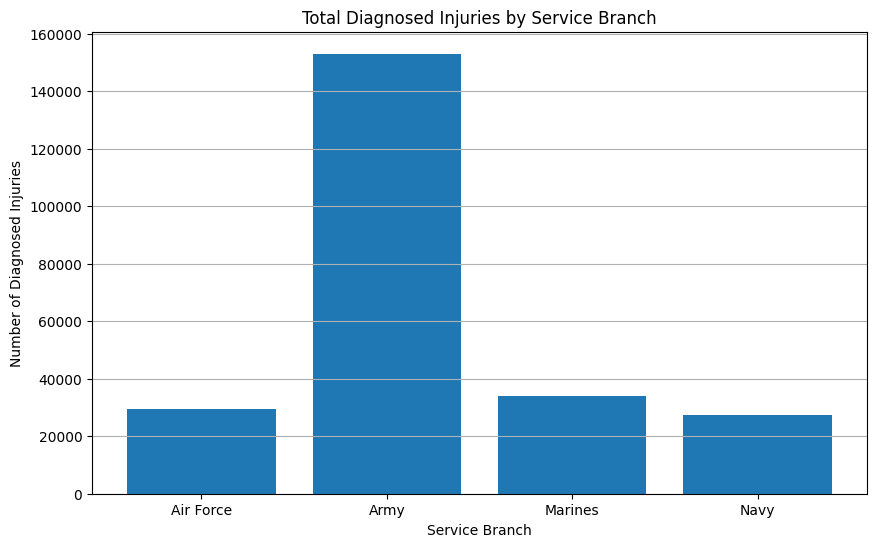

In [28]:

# Aggregating total injuries by service branch
military_service_data = military.groupby('service').agg({
    'diagnosed': 'sum'
}).reset_index()

# Plotting total diagnosed injuries by service branch
plt.figure(figsize=(10, 6))
plt.bar(military_service_data['service'], military_service_data['diagnosed'])
plt.title("Total Diagnosed Injuries by Service Branch")
plt.xlabel("Service Branch")
plt.ylabel("Number of Diagnosed Injuries")
plt.grid(axis='y')
plt.show()


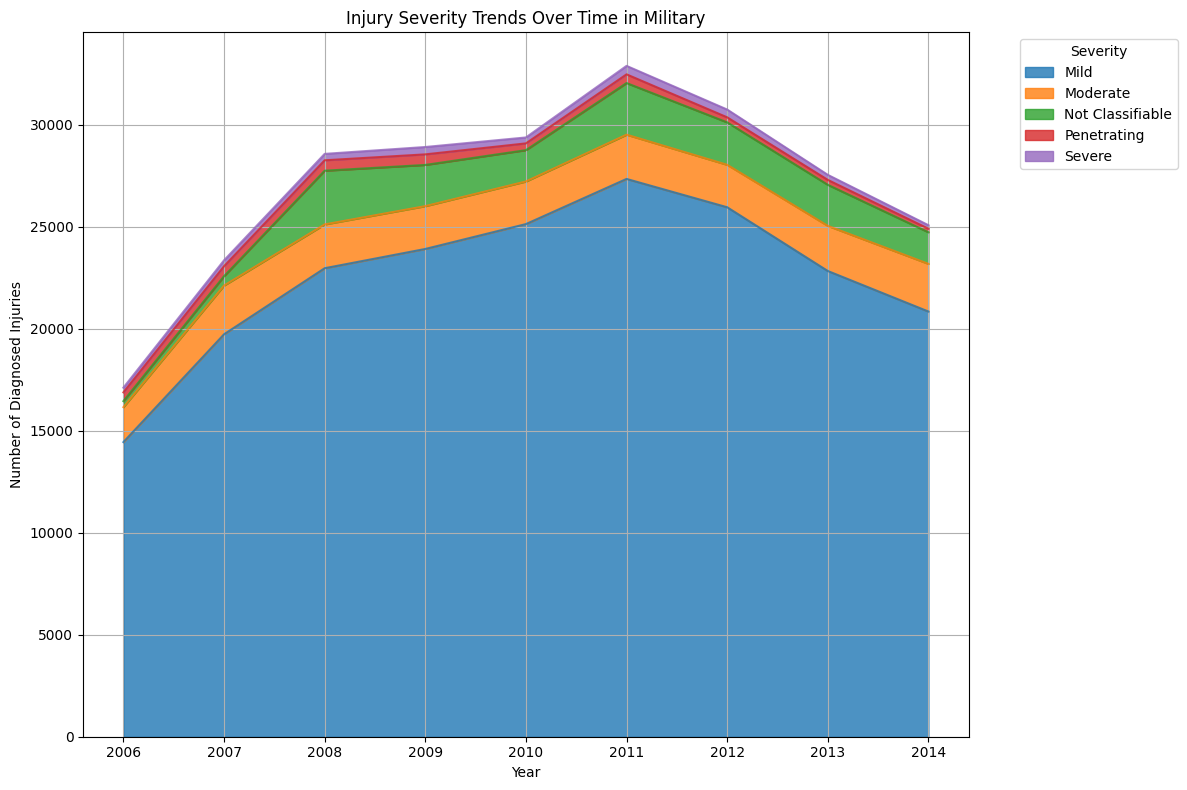

In [29]:

# Analyzing injury severity over years
severity_trends = military.groupby(['year', 'severity']).agg({
    'diagnosed': 'sum'
}).reset_index()

# Pivoting for a stacked area plot
severity_pivot = severity_trends.pivot(index='year', columns='severity', values='diagnosed').fillna(0)

# Stacked area plot for severity levels
severity_pivot.plot.area(figsize=(12, 8), alpha=0.8)
plt.title("Injury Severity Trends Over Time in Military")
plt.xlabel("Year")
plt.ylabel("Number of Diagnosed Injuries")
plt.legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()



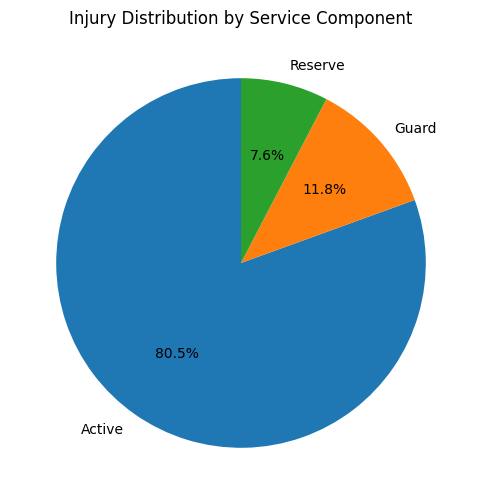

In [30]:
# Injury distribution by service component
component_data = military.groupby('component').agg({
    'diagnosed': 'sum'
}).reset_index()

# Plotting injury distribution by service component
plt.figure(figsize=(10, 6))
plt.pie(component_data['diagnosed'], labels=component_data['component'], autopct='%1.1f%%', startangle=90)
plt.title("Injury Distribution by Service Component")
plt.show()


*c)Analysis of  the demographics based on the **tbi_age** dataset*

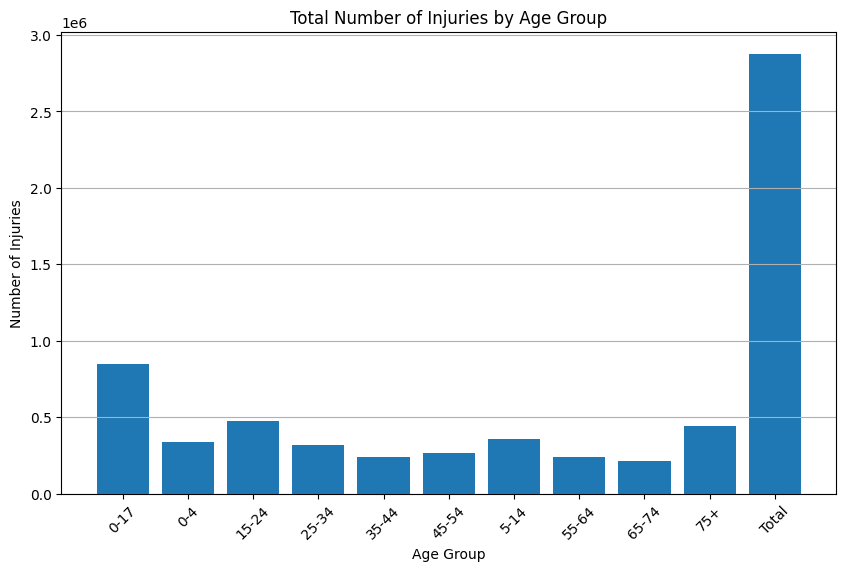

In [31]:
# Demographic Analysis: Analyzing injury distribution by age group and mechanism

# Total number and rate of injuries by age group
age_group_data = age.groupby('age_group').agg({
    'number_est': 'sum',
    'rate_est': 'mean'
}).reset_index()

# Plotting total number of injuries by age group
plt.figure(figsize=(10, 6))
plt.bar(age_group_data['age_group'], age_group_data['number_est'])
plt.title("Total Number of Injuries by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Injuries")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()




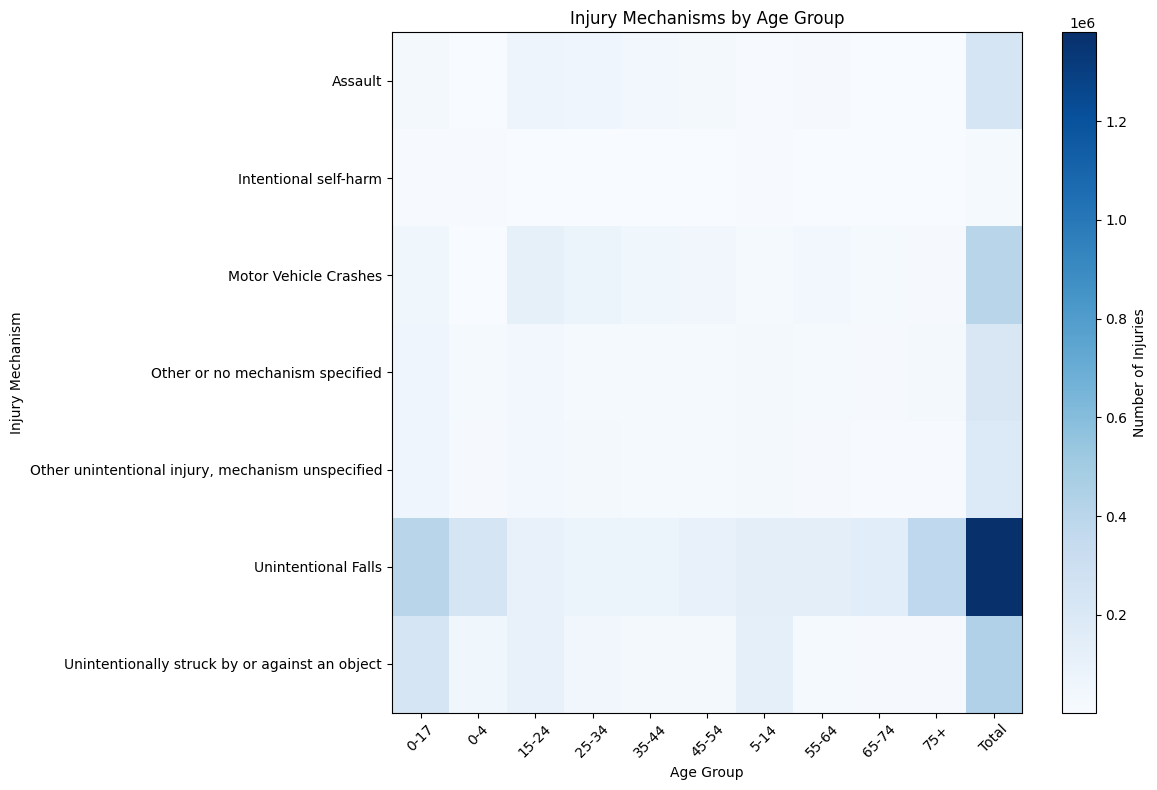

In [32]:
# Most common injury mechanisms per age group
age_mechanism_data = age.groupby(['age_group', 'injury_mechanism']).agg({
    'number_est': 'sum'
}).reset_index()

# Pivoting for heatmap
age_mechanism_pivot = age_mechanism_data.pivot(index='injury_mechanism', columns='age_group', values='number_est').fillna(0)

# Heatmap of injury mechanisms by age group
plt.figure(figsize=(12, 8))
plt.imshow(age_mechanism_pivot, cmap='Blues', aspect='auto')
plt.colorbar(label="Number of Injuries")
plt.title("Injury Mechanisms by Age Group")
plt.xticks(ticks=range(len(age_mechanism_pivot.columns)), labels=age_mechanism_pivot.columns, rotation=45)
plt.yticks(ticks=range(len(age_mechanism_pivot.index)), labels=age_mechanism_pivot.index)
plt.xlabel("Age Group")
plt.ylabel("Injury Mechanism")
plt.tight_layout()
plt.show()

*d) Analysis of features*

* Visualizing military injuries by severity

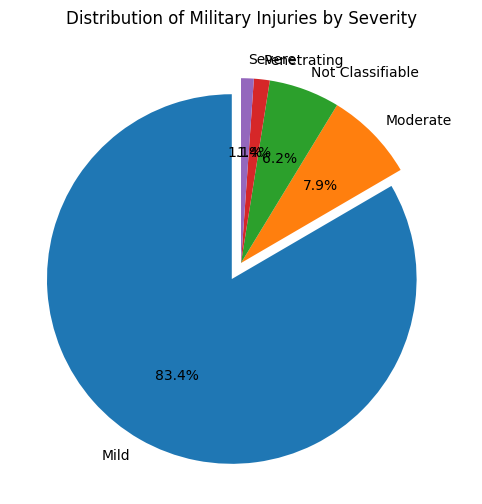

In [33]:
# Aggregate data by severity for plotting
severity_data = military.groupby('severity').agg({
    'diagnosed': 'sum'
}).reset_index()

# Plotting a pie chart for severity levels
plt.figure(figsize=(10, 6))
plt.pie(
    severity_data['diagnosed'],
    labels=severity_data['severity'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.1 if s == 'Mild' else 0 for s in severity_data['severity']]  # Highlight 'Mild' severity
)
plt.title("Distribution of Military Injuries by Severity")
plt.show()


* Military injuries by severity and service over years

<ipython-input-34-0e94c25042b8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


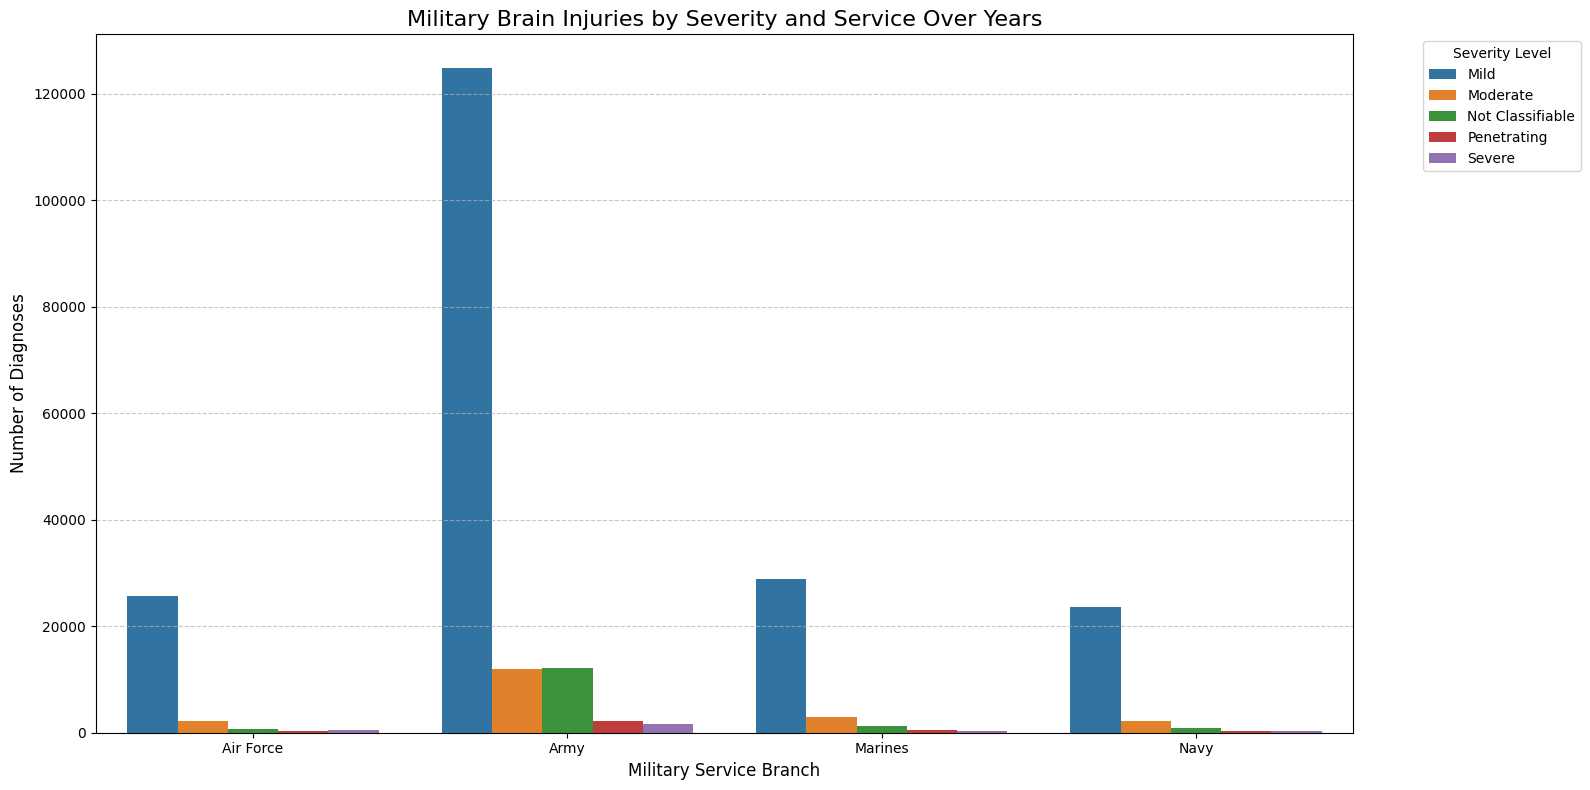

In [34]:

# Prepare the data for visualization
military_severity_service = military.groupby(['year', 'service', 'severity']).agg({
    'diagnosed': 'sum'
}).reset_index()

# Plot using a grouped bar chart
plt.figure(figsize=(16, 8))
sns.barplot(
    data=military_severity_service,
    x='service', y='diagnosed', hue='severity',
    ci=None, estimator=sum, dodge=True
)

plt.title("Military Brain Injuries by Severity and Service Over Years", fontsize=16)
plt.xlabel("Military Service Branch", fontsize=12)
plt.ylabel("Number of Diagnoses", fontsize=12)
plt.legend(title="Severity Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*  Comparing civilian and military injury patterns

In [ ]:

# Aggregate civilian injury mechanisms from 'tbi_year'
civilian_mechanisms = year.groupby('injury_mechanism').agg({
    'number_est': 'sum'
}).reset_index()
civilian_mechanisms.rename(columns={'number_est': 'civilian_injuries'}, inplace=True)

# Aggregate military injury mechanisms from 'tbi_military'
# Map 'severity' to similar injury mechanism categories for a general comparison
military_mechanisms = military.groupby('severity').agg({
    'diagnosed': 'sum'
}).reset_index()
military_mechanisms.rename(columns={'diagnosed': 'military_injuries'}, inplace=True)

# Merge civilian and military datasets for comparison
comparison_data = civilian_mechanisms.set_index('injury_mechanism').join(
    military_mechanisms.set_index('severity'), how='outer'
).fillna(0).reset_index()

# Bar chart comparison
comparison_data.plot(
    kind='bar',
    x='index',
    y=['civilian_injuries', 'military_injuries'],
    figsize=(12, 6),
    alpha=0.8
)
plt.title("Comparison of Civilian vs. Military Injury Patterns")
plt.xlabel("Injury Mechanism / Severity")
plt.ylabel("Number of Injuries")
plt.xticks(rotation=45)
plt.legend(["Civilian", "Military"])
plt.grid(axis='y')
plt.tight_layout()
plt.show()
